In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load USER, MOVIES AND RATINGS as a df
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
item_cols = ['movie_id', 'title', 'release_date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

users = pd.read_csv('ml-100k/u.user', sep="|", names=user_cols, encoding='latin-1')
movies = pd.read_csv('ml-100k/u.item', sep="|", names=item_cols, encoding='latin-1')
ratings = pd.read_csv('ml-100k/u.data', sep="\t", names=rating_cols, encoding='latin-1')

In [3]:
users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
movies.head(10)

,movie_id,title,release_date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,862,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,710,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8012,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1710,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,37557,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,63,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,9598,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,687,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,43323,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
ratings = ratings.drop('timestamp', axis=1)
ratings.head(10)

,user_id,movie_id,rating
0,196,784,3
1,186,2118,3
2,22,14819,1
3,244,4476,2
4,166,184,1
5,298,935,4
6,115,1669,2
7,253,183407,5
8,305,621,3
9,6,1245,3


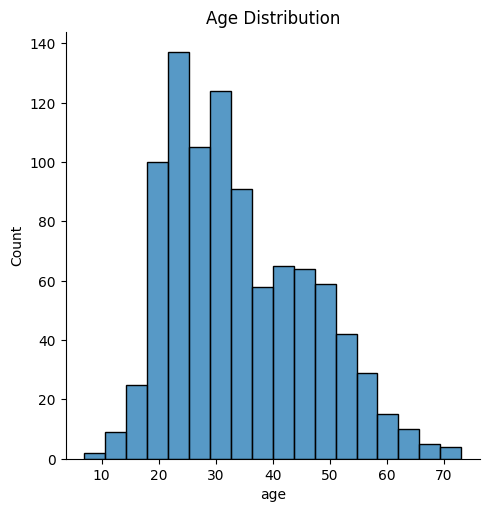

<Figure size 1600x800 with 0 Axes>

In [6]:
# plot age count distribution
sns.displot(data=users, x='age')
plt.title("Age Distribution", fontsize=12)
plt.figure(figsize=(16,8))
plt.show()

In [7]:
movie_ratings_count = ratings.merge(movies, on="movie_id")
movie_ratings_count['title'].value_counts()[0:10]

title
Chasing Amy (1997)             758
Star Wars (1977)               584
Contact (1997)                 509
Return of the Jedi (1983)      508
Fargo (1996)                   508
Liar Liar (1997)               485
English Patient, The (1996)    481
Scream (1996)                  478
Toy Story (1995)               452
Air Force One (1997)           431
Name: count, dtype: int64

In [8]:
# getting ready for train and test split.
from sklearn.model_selection import train_test_split

X = ratings.copy()
y = ratings['user_id']

# split train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify=y, random_state=42)

In [9]:
# compute the RMSE (root mean squared error).
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_predict):
    return np.sqrt(mean_squared_error(y_true, y_predict))

def baseline(user_id, movie_id):
    return 3.0

def score(CF_Model):
    #create tuple pairs based on the test set.
    id_pairs = zip(X_test['user_id'], X_test['movie_id'])

    #get the prediction set 
    y_predict = np.array([CF_Model(user, movie) for (user, movie) in id_pairs])

    y_true = np.array(X_test['rating'])

    return RMSE(y_true, y_predict)

In [10]:
score(baseline)

1.2476426174134927

In [11]:
# USER-BASED FILTERING

# pivot_table rating matrix
rating_matrix = X_train.pivot_table(index='user_id', columns='movie_id', values='rating')
rating_matrix.head()

movie_id,5,6,13,15,18,28,33,62,63,66,...,270710,271078,273537,273740,275233,276031,277270,277804,278438,278589
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,4.0,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,5.0


In [12]:
# User-Based Collab-Filtering using MEAN ratings.
def CF_user_mean(user_id, movie_id):
    if movie_id in rating_matrix:
        mean_rating = rating_matrix[movie_id].mean()
    else:
        mean_rating = 3.0

    return mean_rating

score(CF_user_mean)

1.024894313226929

In [13]:
# Weighted MEAN ratings.
from sklearn.metrics.pairwise import cosine_similarity

#create a dummy ratings matrix, because cosine_similarity does not work with NaN values.
dum_rating_matrix = rating_matrix.copy().fillna(0)

cos_sim_mtx = cosine_similarity(dum_rating_matrix, dum_rating_matrix)

# conv into pandas df
cos_sim_mtx = pd.DataFrame(cos_sim_mtx, index=rating_matrix.index, columns=rating_matrix.index)

cos_sim_mtx.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,944
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.108201,0.036106,0.065908,0.307534,0.309454,0.316571,0.195038,0.087501,0.267384,...,0.102570,0.213357,0.139634,0.172471,0.083551,0.219427,0.121660,0.141286,0.256885,0.120896
2,0.108201,1.000000,0.064806,0.130745,0.070798,0.185946,0.069754,0.097498,0.138864,0.106592,...,0.209430,0.288003,0.353297,0.243490,0.200621,0.177499,0.067976,0.136677,0.079919,0.000000
3,0.036106,0.064806,1.000000,0.337423,0.000000,0.058733,0.025603,0.025980,0.080924,0.040291,...,0.018579,0.099392,0.072498,0.090585,0.000000,0.102674,0.052548,0.072696,0.000000,0.000000
4,0.065908,0.130745,0.337423,1.000000,0.027979,0.044026,0.050858,0.121078,0.129174,0.032646,...,0.046131,0.052650,0.146680,0.163583,0.000000,0.139809,0.143527,0.133418,0.000000,0.000000
5,0.307534,0.070798,0.000000,0.027979,1.000000,0.171483,0.268514,0.178768,0.065376,0.119922,...,0.069247,0.079713,0.099390,0.158338,0.068768,0.182194,0.116503,0.136493,0.210807,0.192625
6,0.309454,0.185946,0.058733,0.044026,0.171483,1.000000,0.361269,0.145499,0.149632,0.358962,...,0.072328,0.131327,0.233505,0.119912,0.098800,0.270613,0.086347,0.219251,0.226119,0.028527
7,0.316571,0.069754,0.025603,0.050858,0.268514,0.361269,1.000000,0.210232,0.100316,0.376804,...,0.108510,0.092351,0.091049,0.138521,0.082300,0.243632,0.049106,0.193253,0.308031,0.074147
8,0.195038,0.097498,0.025980,0.121078,0.178768,0.145499,0.210232,1.000000,0.063244,0.166283,...,0.088087,0.035767,0.056799,0.128547,0.063634,0.141332,0.079056,0.145246,0.211584,0.064307
9,0.087501,0.138864,0.080924,0.129174,0.065376,0.149632,0.100316,0.063244,1.000000,0.104020,...,0.061245,0.120226,0.172783,0.069496,0.000000,0.090841,0.000000,0.075019,0.045899,0.000000


In [14]:
def CF_user_weighted_mean(user_id, movie_id):
    if movie_id in rating_matrix:
        similarity_scores = cos_sim_mtx[user_id]
        movie_ratings = rating_matrix[movie_id]

        idx = movie_ratings[movie_ratings.isnull()].index

        movie_ratings = movie_ratings.dropna()

        similarity_scores = similarity_scores.drop(idx)

        wmean_rating = np.dot(similarity_scores, movie_ratings) / similarity_scores.sum()
    else:
        wmean_rating =3.0
    
    return wmean_rating

score(CF_user_weighted_mean)

1.0183942407210795

In [16]:
from surprise import Reader, Dataset, KNNBasic

#define reader obj
reader = Reader()

data = Dataset.load_from_df(ratings, reader)

knn = KNNBasic()

evaluate(knn, data, measures=['RMSE'])

ImportError: cannot import name 'evaluate' from 'surprise' (/home/achintar/python-projects/ML-Movie-Recommender/venv/lib/python3.11/site-packages/surprise/__init__.py)